<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Black%26Sholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-2cfe2444fc10>:13: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + σ**2 / 2) * T) / (σ * np.sqrt(T))


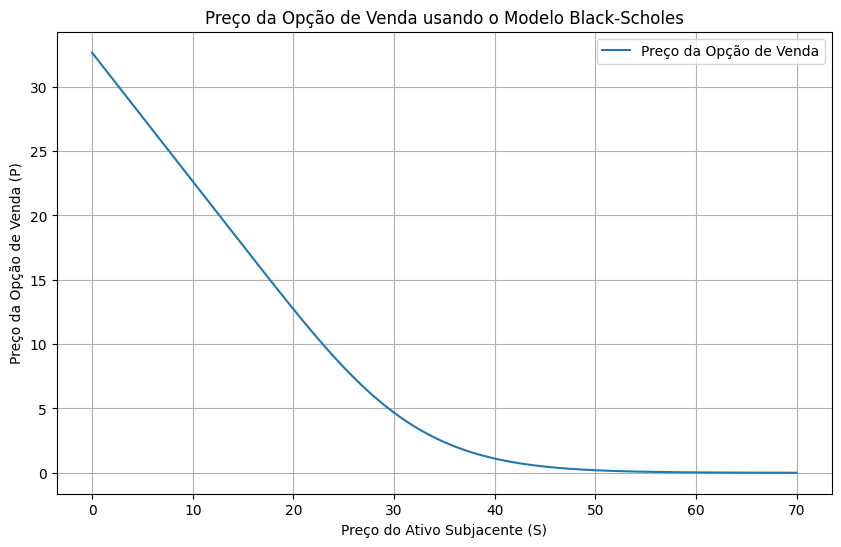

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros
S = np.linspace(0, 70, 100)  # Variação do preço do ativo
K = 37  # Preço de exercício
T = 1  # Tempo até o vencimento em anos
r = 0.125  # Taxa de juros livre de risco
σ = 0.2545  # Volatilidade

# Fórmulas de d1 e d2
d1 = (np.log(S / K) + (r + σ**2 / 2) * T) / (σ * np.sqrt(T))
d2 = d1 - σ * np.sqrt(T)

# Preço da opção de venda
P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(S, P, label='Preço da Opção de Venda')
plt.xlabel('Preço do Ativo Subjacente (S)')
plt.ylabel('Preço da Opção de Venda (P)')
plt.title('Preço da Opção de Venda usando o Modelo Black-Scholes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_gregas(S, K, T, r, σ, option_type='call'):
    """
    Calcula as gregas para uma opção de compra ou venda usando o modelo Black-Scholes.

    Parâmetros:
    S: Preço atual do ativo subjacente
    K: Preço de exercício da opção
    T: Tempo até o vencimento (em anos)
    r: Taxa de juros livre de risco
    σ: Volatilidade do ativo subjacente
    option_type: 'call' para opção de compra, 'put' para opção de venda

    Retorna:
    Delta, Gamma, Theta, Vega, Rho
    """
    d1 = (np.log(S / K) + (r + 0.5 * σ**2) * T) / (σ * np.sqrt(T))
    d2 = d1 - σ * np.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = (-S * norm.pdf(d1) * σ / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        delta = -norm.cdf(-d1)
        theta = (-S * norm.pdf(d1) * σ / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

    gamma = norm.pdf(d1) / (S * σ * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100

    return delta, gamma, theta, vega, rho

# Parâmetros de exemplo
S = 37  # Preço do ativo subjacente
#K = 100  # Preço de exercício
##T = 1  # Tempo até o vencimento em anos
#r = 0.05  # Taxa de juros livre de risco
#σ = 0.2  # Volatilidade

# Cálculo das gregas para uma opção de compra
delta, gamma, theta, vega, rho = black_scholes_gregas(S, K, T, r, σ, 'call')
print(f"Call Option Gregas:\nDelta: {delta}\nGamma: {gamma}\nTheta: {theta}\nVega: {vega}\nRho: {rho}")

# Cálculo das gregas para uma opção de venda
delta, gamma, theta, vega, rho = black_scholes_gregas(S, K, T, r, σ, 'put')
print(f"\nPut Option Gregas:\nDelta: {delta}\nGamma: {gamma}\nTheta: {theta}\nVega: {vega}\nRho: {rho}")


Call Option Gregas:
Delta: 0.7657739847873051
Gamma: 0.041451507314627024
Theta: -0.010939387960346325
Vega: 0.1134942270274488
Rho: 22.863474682015365

Put Option Gregas:
Delta: -0.23422601521269487
Gamma: 0.041451507314627024
Theta: 0.00024293580528039958
Vega: 0.1134942270274488
Rho: -9.788910713614671


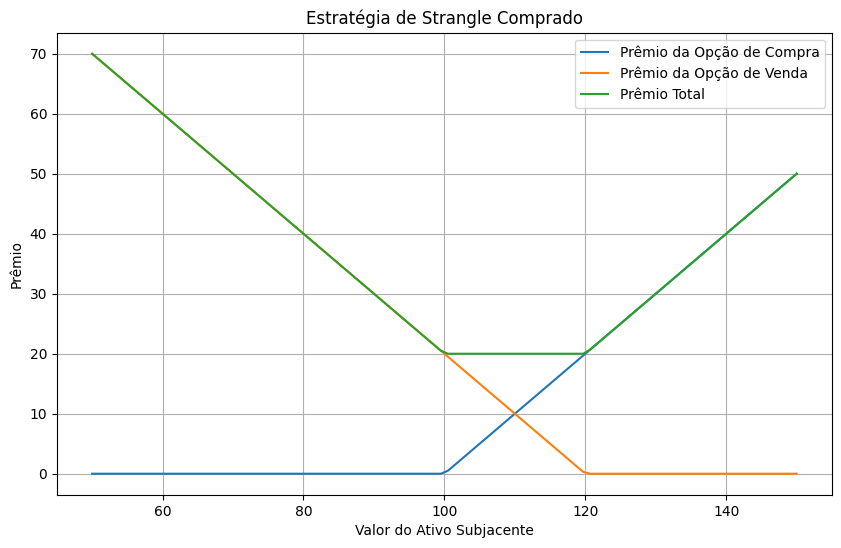

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
S = np.linspace(50, 150, 100)  # Faixa de valores do ativo subjacente
K1 = 100  # Preço de exercício da opção de compra
K2 = 120  # Preço de exercício da opção de venda
premio_call = np.maximum(S - K1, 0)  # Prêmio da opção de compra
premio_put = np.maximum(K2 - S, 0)  # Prêmio da opção de venda
premio_total = premio_call + premio_put  # Prêmio total da estratégia de strangle comprado

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(S, premio_call, label='Prêmio da Opção de Compra')
plt.plot(S, premio_put, label='Prêmio da Opção de Venda')
plt.plot(S, premio_total, label='Prêmio Total')
plt.xlabel('Valor do Ativo Subjacente')
plt.ylabel('Prêmio')
plt.title('Estratégia de Strangle Comprado')
plt.legend()
plt.grid(True)
plt.show()